<a href="https://colab.research.google.com/github/AndromedaOMA/Advanced_Analytics_with_Apache_Spark---E.On_Software_Development/blob/main/Laboratory_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregătire mediu de lucru

In [1]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://dlcdn.apache.org/spark/
!wget -q https://dlcdn.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as f
spark= SparkSession.builder.getOrCreate()
spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,693 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packa

In [6]:
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/practice/parquet'
data_df = spark.read.format('parquet').load(path)
data_df.show(n=10, truncate=False)

+-----------+------+----------------------+-------+-------+----------------------+
|nume       |varsta|ocupatie              |vechime|inactiv|extra                 |
+-----------+------+----------------------+-------+-------+----------------------+
|Daria      |33    |Inginer  mecanic      |7      |NULL   |[EV]                  |
|  Delia    |20    |Medic primar          |0      |true   |NULL                  |
|Diana      |45    |Asistent  social      |23     |NULL   |[XBOX, 3D Printer, PV]|
|Doina      |37    |Specialist  marketing |11     |NULL   |[WII, PS5]            |
| Elena     |25    |Contabil              |1      |NULL   |NULL                  |
|  Eliza    |23    |Instalator            |0      |NULL   |NULL                  |
| Emilia    |25    |Contabil              |1      |NULL   |NULL                  |
|  Eugenia  |24    |Programator           |1      |NULL   |NULL                  |
|Felicia    |34    |Specialist  HR        |8      |NULL   |[WII, PS5]            |
| Fl

---

# Expresii speciale

## Column – Nivelarea datelor

Anumite funcții din Spark SQL pot descompune un singur rând de date în mai multe rânduri. Acestea sunt utilizate
pentru a desface datele din liste sau colecții în rânduri separate, pentru a nivela și reduce complexitatea datelor.

Metoda de nivelare a datelor. (Un obiect de tip Column este returnat cu expresia care va împărți valorile coloanei extra în mai multe rânduri)

In [7]:
expr = f.explode('extra')
data_df.withColumn('consumator', expr).show()

+-----------+------+--------------------+-------+-------+--------------------+----------+
|       nume|varsta|            ocupatie|vechime|inactiv|               extra|consumator|
+-----------+------+--------------------+-------+-------+--------------------+----------+
|      Daria|    33|   Inginer  mecanic |      7|   NULL|                [EV]|        EV|
|      Diana|    45|   Asistent  social |     23|   NULL|[XBOX, 3D Printer...|      XBOX|
|      Diana|    45|   Asistent  social |     23|   NULL|[XBOX, 3D Printer...|3D Printer|
|      Diana|    45|   Asistent  social |     23|   NULL|[XBOX, 3D Printer...|        PV|
|      Doina|    37|Specialist  marke...|     11|   NULL|          [WII, PS5]|       WII|
|      Doina|    37|Specialist  marke...|     11|   NULL|          [WII, PS5]|       PS5|
|    Felicia|    34|      Specialist  HR|      8|   NULL|          [WII, PS5]|       WII|
|    Felicia|    34|      Specialist  HR|      8|   NULL|          [WII, PS5]|       PS5|
|   Florin

În setul de date nou, se va afla câte un rând de date pentru fiecare element a listei.

-----

# Gruparea și Agregarea datelor

### Comenzi de grupare și agregare / transformare

Spark poate transmite și comenzi foarte complexe, comenzi de grupare și agregare / transformare, către executori.
Aceste operații permit gruparea datelor, calculul de statistici pe grupuri și fie consolidarea rândurilor dintr-un grup
în unul singur, fie adăugarea de noi coloane pe baza agregărilor.

**Data Frame**:
1. Citirea Datelor din */path/to/course/data/folder*
2. Adăugarea coloanei *count = mean(vechime)* calculată pentru fiecare rând pe zona din care face parte (Comanda de grupare și transformare: se calculează coloane noi sau se înlocuiesc cele existente, pe baza unei
formule de agregare aplicată pe grupul din care face parte fiecare rând)
3. Gruparea datelor după zona și calcularea coloanei *medie = mean(vechime)* pentru fiecare grup (Comanda de grupare și agregare: se împarte setul de date în grupuri cu date care au aceleași valori pentru
coloanele date pentru grupare, iar apoi se calculează, pe baza unei formule de agregare, per grup, coloane noi)



În analiza datelor, de multe ori întâlnim nevoia de a împărți un set de date în grupuri mai mici, pentru a procesa
împreună datele din fiecare grup, adesea prin metode de agregare pentru a obține perspective noi asupra datelor.

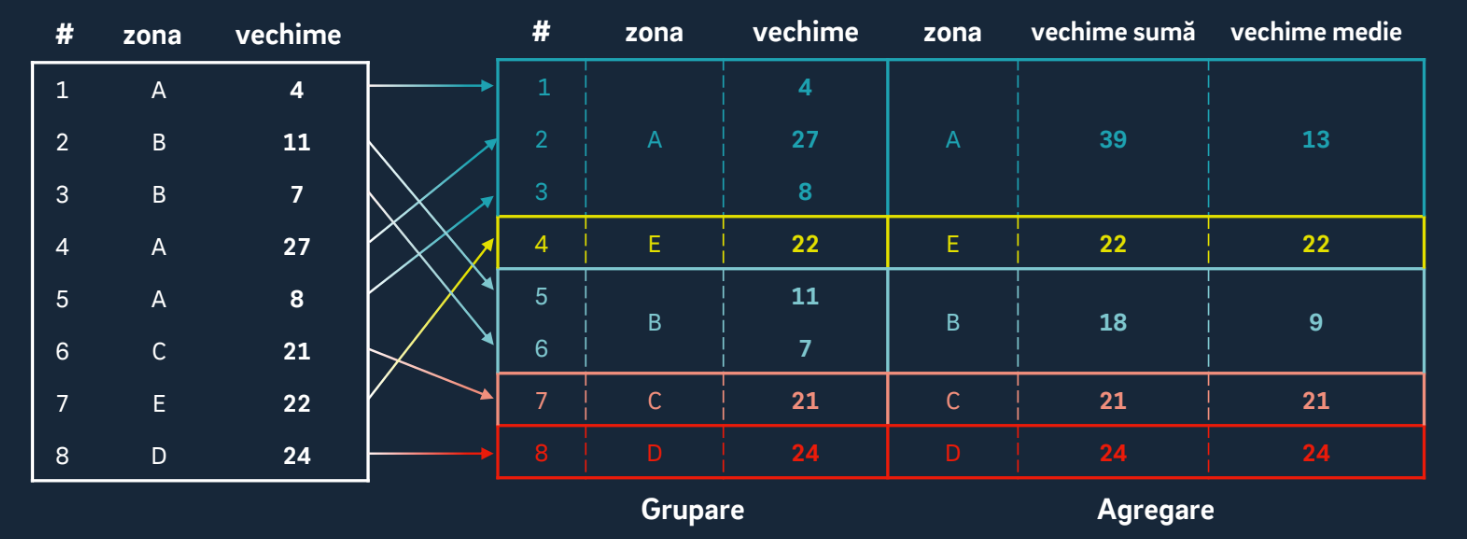

➢ **Pasul de „Grupare”** împarte rândurile din setul de date în grupuri, în funcție de valorile coloanelor. Rândurile
vor face parte din același grup doar dacă au exact aceeași valoare pentru fiecare coloană de grupare.

➢ **Pasul de „Agregare”** calculează valori „agregate” pentru fiecare grup în parte, de exemplu suma unei coloane
pentru tot grupul, și construiește pentru fiecare grup câte un rând folosind coloanele de grup și valorile agregate.

### Gruparea Datelor – Group By

În Spark, comanda de grupare a datelor și agregarea lor se construiește în doi pași, primul fiind instrucțiunile
pentru pasul de grupare, urmate de instrucțiunile pentru pasul de agregare.

Operația de Grupare – Gruparea datelor după valorile coloanelor. (Funcția returnează un obiect special de tip Grouped Data care oferă diverse metode pentru a executa
operații de agregare, de exemplu metode des întâlnite pentru vizualizare precum metodele max și sum.)

In [11]:
data_df.groupby('ocupatie').max().show()
data_df.groupby('ocupatie', 'inactiv').sum().show()

+--------------------+-----------+------------+
|            ocupatie|max(varsta)|max(vechime)|
+--------------------+-----------+------------+
|               Șofer|         29|           4|
|  Muncitor alimentar|         36|          10|
|           Profesor |         20|           0|
|            Contabil|         25|           1|
|      Specialist HR |         34|           8|
|Operator call center|         30|           4|
|     Designer grafic|         49|          30|
|              Jurist|         41|          17|
|         Electrician|         37|          11|
|Specialist marketing|         38|          13|
|           Farmacist|         50|          32|
|    Asistent  social|         44|          21|
|             Jurist |         41|          17|
|        Electrician |         36|          10|
|    Asistent  social|         44|          21|
|   Asistent  medical|         18|           0|
|      Specialist  HR|         34|           8|
|          Farmacist |         50|      

### Column - Funcții de agregare

Pentru a construi expresii de agregare programatic, PySpark oferă funcții speciale de agregare în acest scop. Acestea
se află tot în modulul de funcții din Spark unde se află și funcțiile de transformare a datelor.

Funcțiile de agregare fie acceptă direct numele coloanei, fie o expresie de transformare ce va fi executată înainte.

In [15]:
f.first('vechime', ignorenulls=True)

Column<'first(vechime)'>

In [13]:
f.mean(f.col('vechime') + 1)

Column<'avg((vechime + 1))'>

Unele funcții returnează lista de valori a grupului pentru coloana respectivă cu toate sau o parte din valori.
Putem după să le folosim mai târziu pentru diverse transformări, sau chiar în timpul agregării.

In [20]:
f.collect_list('vechime')

Column<'collect_list(vechime)'>

In [17]:
f.size(f.collect_set(f.col('vechime') + 1))

Column<'size(collect_set((vechime + 1)))'>

Funcțiile și detaliile lor găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html`

### Gruparea Datelor - Agregare

Pentru a executa diverse și complexe agregări în același comandă, folosind expresiile construite, Spark SQL oferă o
metodă generică de agregare. Față de metodele rapide de agregare, numele expresiei este luat în considerare.

Operația de Grupare și Agregare – Gruparea datelor după valorile coloanelor și calcularea agregărilor ( Un nou obiect de tip Data Frame este returnat care va avea doar coloanele de grupare, în acest caz ocupatia, și
coloanele, după numele expresiilor, cu rezultatul agregărilor, în acest caz suma și medie.)

In [22]:
new_data_df = data_df.groupby('ocupatie').agg(f.sum('vechime').alias('suma'), f.mean('vechime').alias('medie'))
new_data_df.show()

+--------------------+----+------------------+
|            ocupatie|suma|             medie|
+--------------------+----+------------------+
|               Șofer|  10|3.3333333333333335|
|  Muncitor alimentar|  19|               9.5|
|           Profesor |   0|               0.0|
|            Contabil|   4|               1.0|
|      Specialist HR |  16|               8.0|
|Operator call center|  12|               4.0|
|     Designer grafic|  30|              30.0|
|              Jurist|  49|16.333333333333332|
|         Electrician|  33|              11.0|
|Specialist marketing|  13|              13.0|
|           Farmacist|  95|31.666666666666668|
|    Asistent  social|  42|              21.0|
|             Jurist |  17|              17.0|
|        Electrician |  10|              10.0|
|    Asistent  social|  21|              21.0|
|   Asistent  medical|   0|               0.0|
|      Specialist  HR|   8|               8.0|
|          Farmacist |  32|              32.0|
|       Ingin

### Gruparea Datelor – Deduplicare

Dacă nu trebuie efectuate agregări, ci doar grupări, pentru a elimina duplicatele din setul de date, există și astfel de
metode. Față de agregare, este necesar un singur pas.

Operația de Deduplicare – Deduplicarea datelor după valorile coloanelor. (Un nou obiect de tip Data Frame este returnat cu valorile distincte din setul de date.) + (Un Data Frame nou este returnat cu primul rând întâlnit pentru fiecare combinație unică de valori.)

In [24]:
distinct_df = data_df.select('nume').distinct().show()
dudplicated_data_df = data_df.dropDuplicates(['nume']).show()

+----------+
|      nume|
+----------+
|   Voicu  |
|    Bogdan|
|    Remus |
|    Lucian|
|      Ion |
|    Cosmin|
|    Carmen|
|    Gina  |
|  Camelia |
|  Robert  |
|   Diandra|
|       Lia|
|   Grigore|
|  Gabriela|
|  Florin  |
|   Daniela|
|     Diana|
|   Tiberiu|
|     Adela|
|  Gheorghe|
+----------+
only showing top 20 rows

+------------+------+--------------------+-------+-------+------+
|        nume|varsta|            ocupatie|vechime|inactiv| extra|
+------------+------+--------------------+-------+-------+------+
|   Cătălin  |    20|        Medic primar|      0|   true|  NULL|
|     Delia  |    20|        Medic primar|      0|   true|  NULL|
|     Eliza  |    23|          Instalator|      0|   NULL|  NULL|
|   Eugenia  |    24|        Programator |      1|   NULL|  NULL|
|    Florin  |    20|       Medic  primar|      0|   true|  NULL|
|      Gina  |    18|   Asistent  medical|      0|   true|  NULL|
|     Ioana  |    21|            Reporter|      0|   NULL|  NULL|
| 

### Un program simplu PySpark cu grupări și agregări de date

In [29]:
from pyspark.sql import SparkSession, functions as f
spark = SparkSession.builder.master('local[*]').getOrCreate()

file_extension = 'parquet'
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/practice/' + file_extension
data_df = spark.read.format(file_extension).load(path)

data_df.show(n=10, truncate=False)

grouped_data_df = (
    data_df
    .withColumn('varsta_contractare', f .col('varsta') - f.col('vechime'))
    .groupBy('varsta_contractare')
    .agg(
        f.sum(f.coalesce(f.col('inactiv'), f.lit(False)).cast('integer')).alias('nr_contracte_inactive'),
        f.mean(f.col('vechime')).alias('vechime_medie')
        )
    ).show(10)

# grouped_data_df.write.format(file_extension).save('/path/to/save/folder')

+-----------+------+----------------------+-------+-------+----------------------+
|nume       |varsta|ocupatie              |vechime|inactiv|extra                 |
+-----------+------+----------------------+-------+-------+----------------------+
|Daria      |33    |Inginer  mecanic      |7      |NULL   |[EV]                  |
|  Delia    |20    |Medic primar          |0      |true   |NULL                  |
|Diana      |45    |Asistent  social      |23     |NULL   |[XBOX, 3D Printer, PV]|
|Doina      |37    |Specialist  marketing |11     |NULL   |[WII, PS5]            |
| Elena     |25    |Contabil              |1      |NULL   |NULL                  |
|  Eliza    |23    |Instalator            |0      |NULL   |NULL                  |
| Emilia    |25    |Contabil              |1      |NULL   |NULL                  |
|  Eugenia  |24    |Programator           |1      |NULL   |NULL                  |
|Felicia    |34    |Specialist  HR        |8      |NULL   |[WII, PS5]            |
| Fl

---

# Gruparea și Transformarea datelor

De multe ori ne întâlnim și cu situația de a fi nevoie să împărți un set de date în grupuri mai mici, dar nu pentru a
combina împreună datele din fiecare grup, ci pentru a folosi valori agregate ale grupurilor în transformarea datelor.

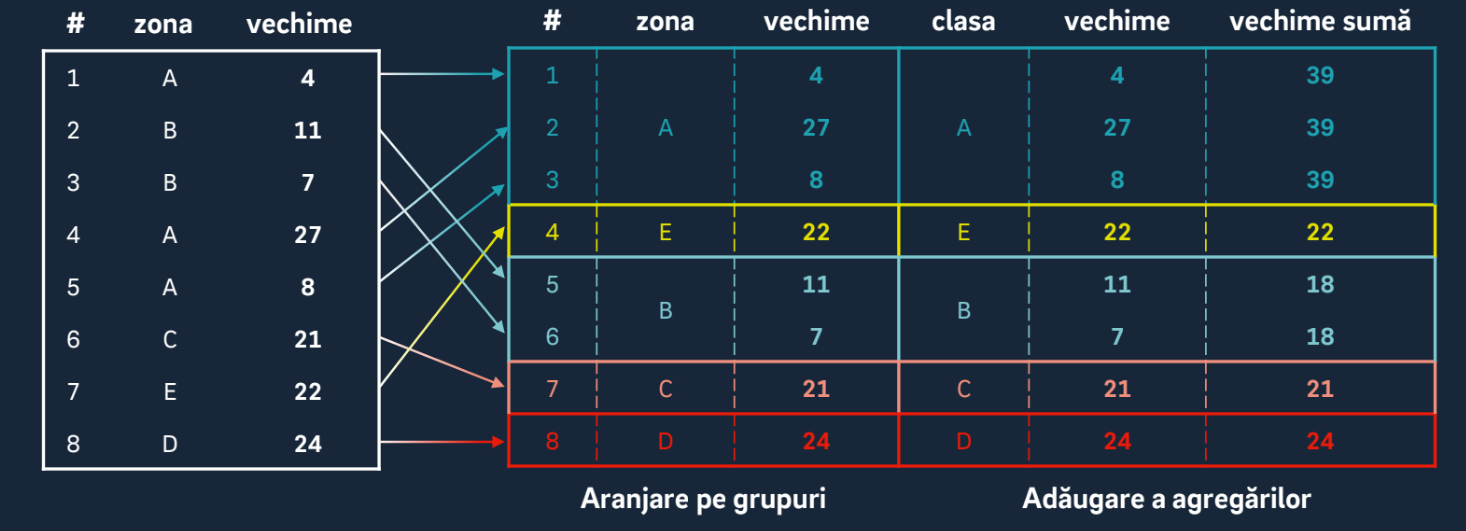

➢ **Pasul de „Aranjare pe grupuri”** împarte rândurile din setul de date în grupuri, în funcție de valorile coloanelor.
Rândurile vor face parte din același grup doar dacă au exact aceeași valoare pentru fiecare coloană de grupare.

➢ **Pasul de „Adăugare a agregărilor”** calculează valori „agregate” pentru fiecare grup în parte, dar de data
aceasta, valorile sunt incorporate sub formă de coloane noi în rândurile existente pentru viitoare transformări.

## Comanda de grupare și transformare - Window

Această comandă este mai flexibilă decât comanda standard de grupare și agregare. Este oferită și posibilitatea de
a selecta specific, în procesul de agregare a unei coloane pentru fiecare rând dintr-un grup, doar anumite valori.

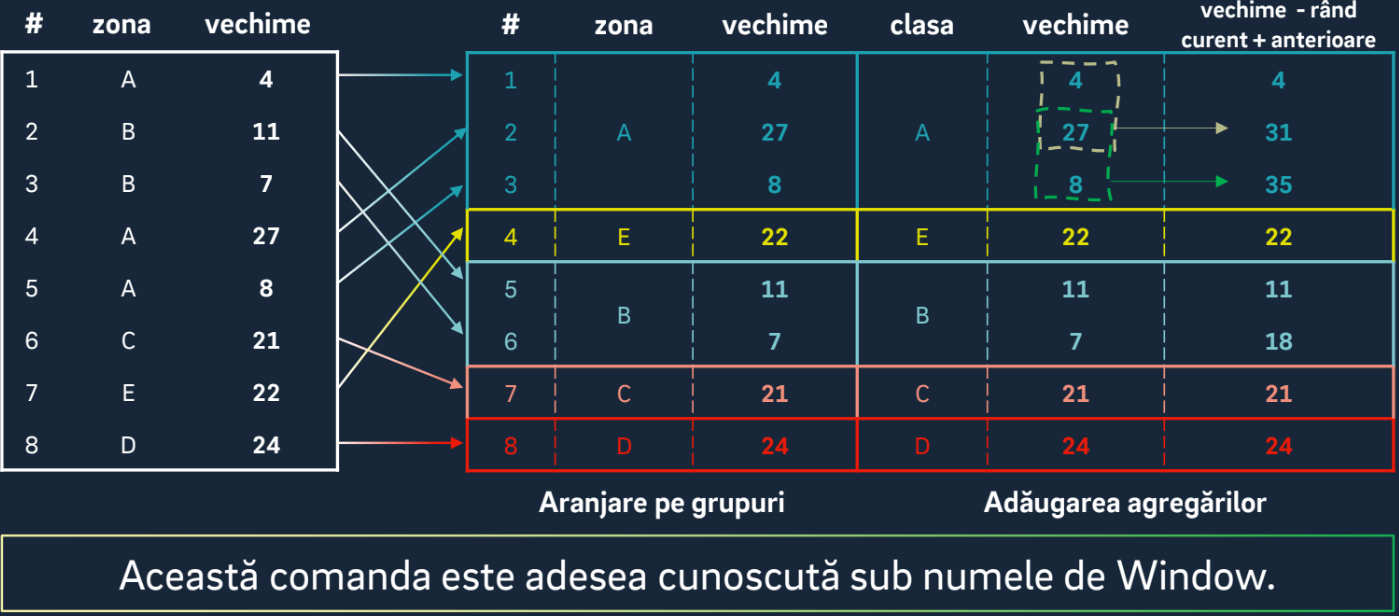

Spark oferă posibilitatea de a defini o „fereastră" continuă de rânduri, relativă la rândul curent, suficientă pentru
multe situații, și eficient optimizată. Pentru selecții mai elaborate, metoda tradițională, agregarea întregului grup și
filtrarea prin condiții IF-ELSE, deși mai lentă și ineficientă, rămâne în continuare singura soluție viabilă.

## Window – Definiția selecției de agregare

Selecția care o putem defini în Spark se poate baza fie pe poziția față de rândul curent, prin ordonarea grupului
conform unuia sau mai multor criterii, fie pe valoarea unei coloane, relativ la valoarea rândul curent.

Pentru această funcționalitate, Spark oferă clasa dedicată *Window*, disponibilă în cadrul librăriei PySpark:

In [30]:
from pyspark.sql import Window

Definirea grupării și a selecției pe baza **poziției** rândului curent, după ordonare. (Selecția cuprinde 5 rânduri precedente, rândul curent și următoarele 2 rânduri, ordonate după vechime)

In [35]:
window = Window.partitionBy('ocupatie').orderBy('vechime').rowsBetween(-5, 2)

Definirea grupării și a selecției pe baza **valorii** rândului curent, după ordonarea pe baza coloanei respective. (Selecția cuprinde rândurile cu valoarea coloanei vechime între valoarea curentă - 5 și valoarea curentă + 6)

In [36]:
window = Window.partitionBy('ocupatie').orderBy('vechime').rangeBetween(-5, 6)

## Window – Selecție parțial limitată

Selecția poate fi și limitată parțial, și pentru selecția pe bază de poziție, si pentru selecția pe bază de valori, prin
folosirea valorilor speciale oferite de clasa Window pentru aceste cazuri.

Definirea grupării și a selecției pe baza **poziției** rândului curent fără limita inferioară. (Selecția cuprinde toate rândurile precedente, rândul curent și următoarele 2 rânduri, ordonate după vechime)

In [38]:
window = Window.partitionBy('ocupatie').orderBy('vechime').rowsBetween(Window.unboundedPreceding, 2)

Definirea grupării și a selecției pe baza **valorii** rândului curent, fără limita superioară. (Selecția cuprinde rândurile cu valoarea coloanei vechime mai mare sau egal cu valoarea curentă - 5)

In [39]:
window = Window.partitionBy('ocupatie').orderBy('vechime').rangeBetween(-5, Window.unboundedFollowing)

OBS: Valorile Window.unboundedPreceding și Window.unboundedFollowing merg în ambele cazuri. Clasa Window oferă
și valoarea specială Window.currentRow în loc de valoarea 0 pentru a specifica rândul curent.

## Window – Selecția întregului grup și restricții

Selecția poate fi și total nelimitată, caz în care toate valorile din grup vor fi folosite la agregare. Această abordare este
de evitat deoarece Spark nu o poate optimiza așa de bine precum selecțiile cu măcar o limită.

Definirea grupării și selecția întregului grup. (Selecția cuprinde toate rândurile din grup. Este echivalent cu specificarea Window.unboundedPreceding și
Window.unboundedFollowing la metodele rowsBetween sau rangeBetween.)

In [ ]:
window = Window.partitionBy('zona')

**Atenție!**

* Dacă nu specificăm nici o ordonare când folosim rowsBetween, ordinea va fi aleatorie!

* Dacă folosim rangeBetween, trebuie să furnizăm o singură coloană la ordonare, care și decide rândurile incluse!

* Este posibil să nu specificăm nici o coloană pentru grupare, caz în care Spark va agrega întreg setul de date.

Detalii despre Window găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/window.html

## Column - Window

Pentru a fi folosite în comenzi de grupare și transformare, Spark oferă posibilitatea apelării funcțiilor de agregare
peste selecția definită.

Construirea unei expresii de agregare pe baza unei selecții definite. (Un nou obiect de tip Column este returnat cu o nouă expresie care calculează suma coloanei vechime
folosind valorile de pe rândul curent și următoarele 2 rânduri, ordonate după vechime.)

In [40]:
window = Window.partitionBy('zona').orderBy('vechime').rowsBetween(0, 2)
expr = f.sum('vechime').over(window)
print(expr)

Column<'sum(vechime) OVER (PARTITION BY zona ORDER BY vechime ASC NULLS FIRST ROWS BETWEEN CURRENT ROW AND 2 FOLLOWING)'>


OBS: Toate funcțiile de agregare suportă metoda over. Există și funcții speciale de analiză special conceput și
doar compatibile cu „ferestre” de rânduri precum metoda row_number sau rank.

Funcțiile și detaliile lor găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

## Gruparea Datelor – Window

La bază fiind o operație de transformare și nu de agregare, ea nemodificând configurația rândurilor, expresiile de
agregare pe window pot fi folosite precum și celelalte expresii cu metodele withColumn, select, etc.

Operația de Agregare pe Window - Exemplu de aplicare folosind metoda withColumn. (Un nou obiect de tip Data Frame este returnat care are adăugată sau actualizată coloana suma cu
rezultatul evaluării expresiei. Expresia se analizează și tipul coloanei este dedus automat.)

In [42]:
varsta_window = Window.partitionBy('ocupatie')
new_data_df = data_df.withColumn('medie_varsta', f.mean(f.col('varsta')).over(varsta_window))
new_data_df.show()

+-----------+------+--------------------+-------+-------+--------------------+------------------+
|       nume|varsta|            ocupatie|vechime|inactiv|               extra|      medie_varsta|
+-----------+------+--------------------+-------+-------+--------------------+------------------+
|       Vali|    23|                    |      4|   NULL|  [3D Printer, XBOX]|28.666666666666668|
|       Vlad|    34|                    |     11|   NULL|                [EV]|28.666666666666668|
|        Bea|    29|                    |      7|   true|                NULL|28.666666666666668|
|   Cristian|    44|    Asistent  social|     21|  false|[XBOX, 3D Printer...|              44.0|
|    Claudia|    36|        Electrician |     10|   NULL|  [XBOX, 3D Printer]|              36.0|
|     Viorel|    50|          Farmacist |     32|  false|[PS5, 3D Printer,...|              50.0|
|    Dumitru|    46|      Inginer  civil|     24|  false|      [PC, XBOX, PV]|              46.0|
|       Dana|    41|

## Un program simplu PySpark folosind metode Window

In [45]:
from pyspark.sql import SparkSession, functions as f, Window

spark = SparkSession.builder.master('local[*]').getOrCreate()
data_df = spark.read.format('parquet').load('/content/drive/MyDrive/E.on/E.on_Data/Data/practice/parquet')
data_df.show()
window = Window.partitionBy('unitate_varsta').orderBy('vechime').rangeBetween(-2, 2)

processed_data_df = (
  data_df
    .withColumn('inactiv', f.coalesce(f.col('inactiv'), f.lit(False)))
    .withColumn('unitate_varsta', f.floor(f.col('varsta') / 5))
    .withColumn('nr_contracte_similare_inactive', f.sum(f.col('inactiv').cast('integer')).over(window))
    .withColumn('nr_contracte_similare', f.count(f.col('inactiv')).over(window))
    .withColumn('probabilitate_inactivare', f .col('nr_contracte_similare_inactive') / f.col('nr_contracte_similare'))
).show()

# processed_data_df.write.format('parquet').save('/path/to/save/folder')

+------------+------+--------------------+-------+-------+--------------------+
|        nume|varsta|            ocupatie|vechime|inactiv|               extra|
+------------+------+--------------------+-------+-------+--------------------+
|       Daria|    33|   Inginer  mecanic |      7|   NULL|                [EV]|
|     Delia  |    20|        Medic primar|      0|   true|                NULL|
|       Diana|    45|   Asistent  social |     23|   NULL|[XBOX, 3D Printer...|
|       Doina|    37|Specialist  marke...|     11|   NULL|          [WII, PS5]|
|      Elena |    25|            Contabil|      1|   NULL|                NULL|
|     Eliza  |    23|          Instalator|      0|   NULL|                NULL|
|     Emilia |    25|            Contabil|      1|   NULL|                NULL|
|   Eugenia  |    24|        Programator |      1|   NULL|                NULL|
|     Felicia|    34|      Specialist  HR|      8|   NULL|          [WII, PS5]|
|    Florina |    28|               Șofe